In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt

In [2]:
!ls /home/anton/Datasets/MovieLens/ml-100k/

allbut.pl  u1.base  u2.test  u4.base  u5.test  ub.base	u.genre  u.occupation
mku.sh	   u1.test  u3.base  u4.test  ua.base  ub.test	u.info	 u.user
README	   u2.base  u3.test  u5.base  ua.test  u.data	u.item


In [3]:
MOVIELENS100K_DIR = "/home/anton/Datasets/MovieLens/ml-100k/"

In [4]:
data_columns = ['User', 'Item', 'Rating', 'Timestamp']
data = pd.read_csv(MOVIELENS100K_DIR + 'u.data', sep='\t', names=data_columns)
data.head()

,User,Item,Rating,Timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
genre = pd.read_csv(MOVIELENS100K_DIR + 'u.genre', sep='|', names=['name', 'code'])
genre.head()

,name,code
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4


In [6]:
!cat /home/anton/Datasets/MovieLens/ml-100k/README

SUMMARY & USAGE LICENSE

MovieLens data sets were collected by the GroupLens Research Project
at the University of Minnesota.
 
This data set consists of:
	* 100,000 ratings (1-5) from 943 users on 1682 movies. 
	* Each user has rated at least 20 movies. 
        * Simple demographic info for the users (age, gender, occupation, zip)

The data was collected through the MovieLens web site
(movielens.umn.edu) during the seven-month period from September 19th, 
1997 through April 22nd, 1998. This data has been cleaned up - users
who had less than 20 ratings or did not have complete demographic
information were removed from this data set. Detailed descriptions of
the data file can be found at the end of this file.

Neither the University of Minnesota nor any of the researchers
involved can guarantee the correctness of the data, its suitability
for any particular purpose, or the validity of results based on the
use of the data set.  The data set may be used for any research
purposes under th

In [7]:
item_column_names = list(map(str.strip, """ movie id | movie title | release date | video release date |
              IMDb URL | unknown | Action | Adventure | Animation |
              Children's | Comedy | Crime | Documentary | Drama | Fantasy |
              Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |
              Thriller | War | Western""".split('|')))

items = pd.read_csv(MOVIELENS100K_DIR + 'u.item', sep='|', 
                    encoding = "ISO-8859-1",
                    names=item_column_names, index_col = 'movie id')
items.head()

,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
users_columns = list(map(str.strip, "user id | age | gender | occupation | zip code".split('|')))
users = pd.read_csv(MOVIELENS100K_DIR + 'u.user', sep='|',
                   names = users_columns,
                   index_col='user id')
users.head()

,age,gender,occupation,zip code
user id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


# Provided splits are not good because they are not splitted by time correctly

In [9]:
u1_train = pd.read_csv(MOVIELENS100K_DIR + 'u1.base', sep='\t', names=data_columns)
u1_train.head()

,User,Item,Rating,Timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


In [10]:
u1_test = pd.read_csv(MOVIELENS100K_DIR + 'u1.test', sep='\t', names=data_columns)
u1_test.head()

,User,Item,Rating,Timestamp
0,1,6,5,887431973
1,1,10,3,875693118
2,1,12,5,878542960
3,1,14,5,874965706
4,1,17,3,875073198


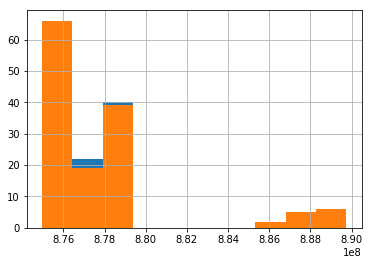

In [11]:
u1_train['Timestamp'][u1_train['User'] == 1].hist()
u1_test['Timestamp'][u1_test['User'] == 1].hist()

# Annotate sessions ( break of at least 20 minutes (1200 sec) between different sessions) 

In [12]:
sessions = data.groupby(by='User').apply(lambda x: (x.sort_values('Timestamp')['Timestamp'].diff() > 1200).cumsum(skipna=False))

In [13]:
data['Session'] = sessions.droplevel(level=0)

In [14]:
data.sort_values(['User', 'Session']).head()

,User,Item,Rating,Timestamp,Session
972,1,117,3,874965739,0
1382,1,253,5,874965970,0
9170,1,14,5,874965706,0
10480,1,248,4,874965954,0
12948,1,250,4,874965706,0


# Split sessions by train/test 80/20  (can be mixed by time)

In [15]:
for (User, SessionId), group in data.groupby(by=['User', 'Session']):
    print(User)
    print(SessionId)
    print(group)
    break

1
0
       User  Item  Rating  Timestamp  Session
972       1   117       3  874965739        0
1382      1   253       5  874965970        0
9170      1    14       5  874965706        0
10480     1   248       4  874965954        0
12948     1   250       4  874965706        0
15764     1   196       5  874965677        0
20470     1   246       5  874965905        0
21626     1   187       4  874965678        0
22971     1   166       5  874965677        0
24896     1   249       4  874965970        0
32236     1     1       5  874965758        0
38193     1   181       5  874965739        0
38751     1   257       4  874965954        0
40519     1   109       5  874965739        0
45796     1    50       5  874965954        0
48214     1   156       4  874965556        0
53552     1   127       5  874965706        0
59972     1   168       5  874965478        0
74577     1   165       5  874965518        0
92487     1   172       5  874965478        0


In [16]:
sessions = list(data.groupby(by=['User', 'Session']))

In [17]:
N = len(sessions)
split = int(0.8*N)
print(split, N-split)

2317 580


In [18]:
from collections import defaultdict

In [19]:
session_items = defaultdict(list)
session_rewards = defaultdict(list)

for (uid, sid), session in sessions:
    s_items = session['Item'].values
    s_ratings = session['Rating'].values
    
    session_items[uid].append(s_items)
    session_rewards[uid].append(s_ratings)

In [20]:
users_order = data.sort_values('Timestamp')['User'].values

# Create environment

In [21]:
import warnings
from collections import defaultdict

import gym
import numpy as np
from gym.spaces import Discrete
from gym.utils import seeding
from surprise import Dataset, SVD, Reader
from surprise.model_selection import train_test_split

from rec_gym.spaces.ntuple_space import NDiscreteTuple
from rec_gym.envs.utils import User, Item

from itertools import groupby

In [22]:
data.head()

,User,Item,Rating,Timestamp,Session
0,196,242,3,881250949,0
1,186,302,3,891717742,3
2,22,377,1,878887116,0
3,244,51,2,880606923,0
4,166,346,1,886397596,0


In [23]:
reader = Reader(rating_scale=(1, 5))
dataset = Dataset.load_from_df(data[['User', 'Item', 'Rating']], reader)
trainset = dataset.build_full_trainset()

In [24]:
algo = SVD(n_factors=100, biased=False)
algo.fit(trainset)

In [25]:
session_time = 20 * 60

In [26]:
sessions = data.groupby(by='User').apply(lambda x: (x.sort_values('Timestamp')['Timestamp'].diff() > 1200).cumsum(skipna=False))
data['Session'] = sessions.droplevel(0)

In [27]:
sessions_list = list(data.groupby(by=['User', 'Session']))

In [28]:
session_items = defaultdict(list)
session_rewards = defaultdict(list)

for (uid, sid), session in sessions_list:
    s_items = session['Item'].values
    s_ratings = session['Rating'].values
    
    session_items[uid].append(s_items)
    session_rewards[uid].append(s_ratings)

In [29]:
users_order = data.sort_values('Timestamp')['User'].values
users_order = [x[0] for x in groupby(users_order)]

In [30]:
users_session_number = defaultdict(int)

In [31]:
for uid in users_order:
    i = users_session_number[uid]
    print(session_items[uid])
    print(session_rewards[uid])
    break

[array([ 117,  255,  772,  210,  405,  176,  108,  357,  200,  185,  288,
        298, 1074,  173,  286,  928]), array([ 12,  98, 317,  97, 181]), array([154, 168]), array([ 269,  180,  179, 1135,  475]), array([121,  15]), array([294]), array([762, 235, 313,  65, 172, 293, 748, 546]), array([750, 147, 781]), array([959, 484,  39, 271])]
[array([4, 4, 4, 4, 3, 4, 4, 5, 4, 4, 3, 4, 3, 4, 4, 4]), array([5, 4, 5, 4, 4]), array([5, 5]), array([3, 5, 4, 5, 5]), array([3, 3]), array([3]), array([2, 2, 5, 3, 4, 4, 4, 3]), array([4, 4, 3]), array([4, 4, 4, 3])]


In [32]:
i = 0
current_user = users_order[i]
current_user_session_number = users_session_number[current_user]
current_item_list = session_items[current_user][current_user_session_number]
current_reward_list = session_rewards[current_user][current_user_session_number]

In [33]:
import cloudpickle

In [34]:
import warnings
from collections import defaultdict

import gym
import numpy as np
from gym.spaces import Discrete
from gym.utils import seeding
from surprise import Dataset, SVD
from surprise.model_selection import train_test_split

from rec_gym.spaces.ntuple_space import NDiscreteTuple
from rec_gym.envs.utils import User, Item
import cloudpickle 
import os

class MovieLensDRR(gym.Env):
    def __init__(self,
                 embedding_dimension=20,
                 n_items_to_recommend=1,
                 seed=0,
                 normalize_reward=False,
                 filename="/home/anton/Datasets/MovieLens/ml-100k/u.data",
                 sep = '\t',
                 session_time = 20 * 60,
                 cache_dir='~/cache/'
                ):
        """
        Environment that models some sequential recommendation process by using MovieLens Dataset
        PMF (Probabilistic Matrix Factorization) is performed to obtain user/item embeddings

        :param embedding_dimension: size of the user/item embeddings
        :param n_items_to_recommend:  number of items to recommend actions is a list of that size
        :param seed:
        :param normalize_reward: normalize [1,5] ranks to [-1,1] rewards
        :param dataset_name: 'ml-100k' , 'ml-1m'
        """
        self.normalize_reward = normalize_reward
        self.embedding_dimension = embedding_dimension
        self.n_rec = n_items_to_recommend
        self.seed(seed)
        
        cache_name = '_'.join([str(embedding_dimension), str(session_time)]+filename.split('/')[-2:])
        if not os.path.exists(cache_dir):
            os.mkdir(cache_dir)
        cache_dir_name = os.path.join(cache_dir, cache_name)
        
        if not os.path.exists(cache_dir_name):
            os.mkdir(cache_dir_name)
        
            self.filename = filename
            data_columns = ['User', 'Item', 'Rating', 'Timestamp']
            data = pd.read_csv(self.filename, sep=sep, names=data_columns)
            reader = Reader(rating_scale=(1, 5))
            dataset = Dataset.load_from_df(data[['User', 'Item', 'Rating']], reader)
            self.trainset = dataset.build_full_trainset()

            self.algo = SVD(n_factors=self.embedding_dimension, biased=False)
            self.algo.fit(self.trainset)
            # BEGIN session split
            sessions = data.groupby(by='User').apply(lambda x: (x.sort_values('Timestamp')['Timestamp'].diff() > session_time).cumsum(skipna=False))
            data['Session'] = sessions.droplevel(0)


            self.session_items = defaultdict(list)
            self.session_rewards = defaultdict(list)
            self.users_order = []

            for (uid, sid), session in data.groupby(by=['User', 'Session']):
                # convert raw uids to inner uids
                uid = self.algo.trainset.to_inner_uid(uid)
                # convert raw iids to inner iids
                s_items = session['Item'].values
                s_items = [self.algo.trainset.to_inner_iid(x) for x in s_items]

                s_ratings = session['Rating'].values

                self.users_order.append(uid)
                self.session_items[uid].append(s_items)
                self.session_rewards[uid].append(s_ratings)       
            # END session split
            with open(os.path.join(cache_dir_name, 'data'), 'wb') as f:
                cloudpickle.dump([self.algo, 
                                  self.users_order,
                                  self.session_items, 
                                  self.session_rewards] , f)
            
        else:
            print('User cache %s' % cache_dir_name)
            # Cache 
            # self.algo
            # self.users_order
            # self.session_items
            # self.session_rewards
            with open(os.path.join(cache_dir_name, 'data'), 'rb') as f:
                self.algo, self.users_order, self.session_items, self.session_rewards = cloudpickle.load(f) 
            
            
        self.train_ranks = defaultdict(dict)
        for u, i, r in self.algo.trainset.all_ratings():
            self.train_ranks[u][i] = r
        
        self.users_session_number = defaultdict(int)
        self.users = self.algo.pu
        self.items = self.algo.qi

        self.n_users = len(self.users)
        self.n_items = len(self.items)

        self.Users = {}
        for i in range(self.n_users):
            user = User(id=i, embedding=self.users[i])
            self.Users[user.id] = user

        self.Items = {}
        for j in range(self.n_items):
            item = Item(id=j, embedding=self.items[j], use_until=np.inf)
            self.Items[item.id] = item
        
        # logs
        self.steps_count = 0
        self.info = {}

        # TODO: make action and observation space. checkout robotics envs + FlattenDictWrapper
        # https://github.com/openai/gym/tree/5404b39d06f72012f562ec41f60734bd4b5ceb4b/gym/envs/robotics
        self.action_space = None
        self.observation_space = None

    def seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def _get_observation(self):
        """
        Get items available for recommendation for `self.active_uid` user
        i.e. the items that user didn't interacted with (didn't receive as a recommendation)

        :return: (user_repr, possible_items):
                user_repr - User
                possible_items - list of Items
        """
        pos = 0
        self.item_pos2id = {}
        possible_items = []

        for i in self.curr_possible_list:
            possible_items.append(self.Items[i])
            self.item_pos2id[pos] = i
            pos += 1

        self.action_space = NDiscreteTuple(Discrete(len(possible_items)), self.n_rec)
        self.observation_space = None
        return self.Users[self.curr_user], possible_items

    def _reward(self, action):
        """
        Compute reward as scalar product of user and item embeddings obtained by PMF
        Normalize if `self.normalize_reward` is True

        :param action: array of indexes of size `self.n_rec` in possible items
        :return:
        """
        assert len(action) == self.n_rec
        uid = self.curr_user
        rewards = []
        iids = []
        
        def normalize(r):
            return 0.5*(r-3)
        
        for a in action:
            iid = self.item_pos2id[a]
            
            if uid in self.train_ranks and iid in self.train_ranks[uid]:
                r = self.train_ranks[uid][iid]
            else:    
                r = self.algo.estimate(u=uid, i=iid)
            
            if self.normalize_reward:
                r = normalize(r)
            
            rewards.append(r)
            iids.append(iid)
            
            self.curr_possible_list.remove(iid)

        
        gt_items = self.session_items[self.curr_user][self.curr_user_session_number][self.in_session_pos:self.in_session_pos+self.n_rec]
        gt_rewards = self.curr_reward_list[self.in_session_pos:self.in_session_pos+self.n_rec]
        norm_gt_rewards = [normalize(r) for r in gt_rewards]
        self.info = {
            'rewards': rewards,
            'recs': iids,
            'ground_truth_items' : gt_items, 
            'ground_truth_rewards' : gt_rewards, 
            'norm_truth_rewards' : norm_gt_rewards,
            'uid' : uid,
        }
        self.in_session_pos += self.n_rec
        return np.sum(rewards)

    def get_ground_truth_action(self):
        gt_items = self.session_items[self.curr_user][self.curr_user_session_number][self.in_session_pos:self.in_session_pos+self.n_rec]
        id2pos = {v : k for k, v in self.item_pos2id.items()}
#         print(id2pos)
        return [id2pos[x] for x in gt_items]
    
    def step(self, action):
        """

        :param action: array of indexes of size `self.ncache_rec` in possible items
        :return: observation: (user_repr, possible_items)
                 reward:  sum of scores for each item in the action
                 done:  always False
                 info:
        """
        self.steps_count += 1
        self.info = {}
        reward = self._reward(action)
        
        done = len(self.curr_possible_list) <= self.n_rec
        if done:
            observation = None
        else:
            observation = self._get_observation()
        info = self.info
        return observation, reward, done, info

    def reset(self):
        """
        :return: initial observation
        """
        if (self.steps_count == 0):
            # CURRENT STATE
            self.curr_user_pos = 0
            self.curr_user = self.users_order[self.curr_user_pos]
            self.curr_user_session_number = self.users_session_number[self.curr_user]
            self.curr_possible_list = set(self.session_items[self.curr_user][self.curr_user_session_number])
            self.curr_reward_list = self.session_rewards[self.curr_user][self.curr_user_session_number]
            
            self.in_session_pos = 0
        else:
            while True:
                self.users_session_number[self.curr_user] += 1

                self.curr_user_pos += 1
                self.curr_user = self.users_order[self.curr_user_pos]
                self.curr_user_session_number = self.users_session_number[self.curr_user]
                self.curr_possible_list = set(self.session_items[self.curr_user][self.curr_user_session_number])
                self.curr_reward_list = self.session_rewards[self.curr_user][self.curr_user_session_number]
                self.in_session_pos = 0
                if (len(self.curr_possible_list) >= self.n_rec): break 

        observation = self._get_observation()
        return observation

    def render(self, mode='human'):
        pass


In [35]:
CACHE_DIR = "/home/anton/cache"

In [36]:
# %%time
# env = MovieLensDRR(embedding_dimension=20, 
#              n_items_to_recommend=1, 
#              seed=0,
#              normalize_reward=True,
#              filename="/home/anton/Datasets/MovieLens/ml-100k/u.data",
#              sep='\t',
#              session_time = 20 * 60,
#              cache_dir=CACHE_DIR)

In [37]:
# %lprun -f MovieLensDRR.__init__ MovieLensDRR(embedding_dimension=20, \
#                                      n_items_to_recommend=1, \
#                                      seed=0, \
#                                      normalize_reward=True, \
#                                      filename="/home/anton/Datasets/MovieLens/ml-1m/ratings.dat",\
#                                            sep='::',\
#                                      session_time = 20 * 60, \
#                                        cache_dir= CACHE_DIR)

In [38]:
# env = MovieLensDRR(embedding_dimension=20, \
#                                      n_items_to_recommend=5, \
#                                      seed=0, \
#                                      normalize_reward=True, \
#                                      filename="/home/anton/Datasets/MovieLens/ml-1m/ratings.dat",\
#                                            sep='::',\
#                                      session_time = 20 * 60, \
#                                        cache_dir= CACHE_DIR)

# Train

In [39]:
# env = MovieLensDRR(embedding_dimension=20, \
#                                      n_items_to_recommend=5, \
#                                      seed=0, \
#                                      normalize_reward=True, \
#                                      filename="/home/anton/Datasets/MovieLens/ml-1m/ratings.dat",\
#                                            sep='::',\
#                                      session_time = 20 * 60, \
#                                        cache_dir= CACHE_DIR)

In [40]:
# %load_ext autoreload
# %autoreload 2

In [41]:
from rec_gym.wrappers import StatsWrapper, BaselinesWrapper

In [42]:
from agents.utils import Agent
import numpy as np

class PopularityAgent(Agent):
    def __init__(self, env):
        self.rec_size = env.n_rec
        self.env = env
        
        self.items_clicks = defaultdict(lambda: 0)
        self.items_positive_clicks = defaultdict(lambda: 0)
        self.items_mean_ranks = defaultdict(lambda: -np.inf)
        
        self.eval_mode = False
        
    def begin_episode(self, observation):
        if not self.eval_mode:
            return self._select_action_train(observation)
        return self._select_action_eval(observation)

    def step(self, reward, observation, info=None):
        if info:
            self._update_info(info)
            
        if not self.eval_mode:
            return self._select_action_train(observation)
        return self._select_action_eval(observation)

    def end_episode(self, reward, info=None):
        if info:
            self._update_info(info)

#     def bundle_and_checkpoint(self, directory, iteration):
#         pass

#     def unbundle(self, directory, iteration, dictionary):
#         pass
    def _update_info(self, info):
        for i, r in zip(info['recs'], info['rewards']):
            if (r > 0):
                self.items_positive_clicks[i] += 1
                
            n = self.items_clicks[i]
            if n == 0:
                self.items_mean_ranks[i] = r
            else:
                self.items_mean_ranks[i] = (self.items_mean_ranks[i] * n + r)/(n+1)
                
            self.items_clicks[i] += 1
            

    def _select_action_train(self, observation):
        return self.env.get_ground_truth_action()
    
    def _select_action_eval(self, observation):
        user, items = observation
        item_ids = [i.id for i in items]
        
        clicks = [ self.items_positive_clicks[i] for i in item_ids]
        ranks = [self.items_mean_ranks[i] for i in item_ids]
        
        return np.argsort(clicks)[::-1][:self.rec_size]
#         return np.argsort(ranks)[::-1][:self.rec_size]
        

In [43]:
from agents.utils import Agent
import numpy as np
from surprise import SVD

class SVDAgent(Agent):
    def __init__(self, env):
        self.rec_size = env.n_rec
        self.env = env
        
        self.users = []
        self.items = []
        self.ratings = []
        
        self.__eval_mode = False
        
    def begin_episode(self, observation):
        if not self.eval_mode:
            return self._select_action_train(observation)
        return self._select_action_eval(observation)

    def step(self, reward, observation, info=None):
        if info:
            self._update_info(info)
            
        if not self.eval_mode:
            return self._select_action_train(observation)
        return self._select_action_eval(observation)

    def end_episode(self, reward, info=None):
        if info:
            self._update_info(info)

#     def bundle_and_checkpoint(self, directory, iteration):
#         pass

#     def unbundle(self, directory, iteration, dictionary):
#         pass

    @property
    def eval_mode(self):
        return self.__eval_mode
    
    @eval_mode.setter
    def eval_mode(self, x):
        self.train()
        self.__eval_mode = x
    

    def _update_info(self, info):
        uid = info['uid']
        for i, r in zip(info['recs'], info['rewards']):
            self.users.append(uid)
            self.items.append(i)
            self.ratings.append(r)
    
    def _select_action_train(self, observation):
        return self.env.get_ground_truth_action()
    
    def _select_action_eval(self, observation):
        user, items = observation
        item_ids = [i.id for i in items]
        uid = user.id
        
        scores = [self.algo.predict(uid, i).est for i in item_ids]
        
        return np.argsort(scores)[::-1][:self.rec_size] 
    
    def train(self):
        
        print('Train SVD')
        # Creation of the dataframe. Column names are irrelevant.
        ratings_dict = {'itemID': self.items,
                        'userID': self.users,
                        'rating': self.ratings}
        df = pd.DataFrame(ratings_dict)

        # A reader is still needed but only the rating_scale param is requiered.
        reader = Reader(rating_scale=(1, 5))

        # The columns must correspond to user id, item id and ratings (in that order).
        data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)
        trainset = data.build_full_trainset()
        
        self.algo = SVD(n_factors=20)
        self.algo.fit(trainset)
        

In [44]:
from agents.utils import Agent

class LinUCB(Agent):
    def __init__(self,
                 d: int,
                 alpha: int = 0.2):

        self.d = d
        self.alpha = alpha

        # parameters of action by their id
        self.As = {}
        self.bs = {}

        self.last_action_id = None
        self.last_context = None
        
        self.eval_mode = False

    def _choose_action(self, observation):
        user, items = observation

        ps = np.zeros(len(items))
        pos2id = np.zeros(len(items))

        for idx, i in enumerate(items):
            
            x = i.embedding
            
            if i.id not in self.As:
                self.As[i.id] = np.eye(self.d)
                self.bs[i.id] = np.zeros(self.d)

            A_inv = np.linalg.inv(self.As[i.id])
            theta = A_inv.dot(self.bs[i.id])
            ta = x.dot(A_inv).dot(x)
            a_upper_ci = self.alpha * np.sqrt(ta)
            a_mean = theta.dot(x)
            p = a_mean + a_upper_ci

            ps[idx] = p
            pos2id[idx] = i.id

        max_pos = np.argmax(ps)

        self.last_action_id = pos2id[max_pos]
        self.last_context = x
        return [max_pos]

    def _update_matrices(self, reward):
        
        if self.last_action_id is not None:
            self.As[self.last_action_id] += np.outer(self.last_context, self.last_context)
            self.bs[self.last_action_id] += reward * self.last_context

    def begin_episode(self, observation):
        return self._choose_action(observation)

    def step(self, reward, observation, info=None):
        # update matrix of previous action with reward
        self._update_matrices(reward)
        # select action from observation
        return self._choose_action(observation)

    def end_episode(self, reward, info=None):
        # update matrix of previous action with reward
        self._update_matrices(reward)

    def bundle_and_checkpoint(self, directory, iteration):
        # pickle all fields to directory
        bundle_dictionary = {'As': self.As,
                             'bs': self.bs,
                             'd': self.d,
                             'alpha': self.alpha}
        return bundle_dictionary

    def unbundle(self, directory, iteration, dictionary):
        # unpickle all fields from directory
        for key in self.__dict__:
            if key in dictionary:
                self.__dict__[key] = dictionary[key]

In [45]:
from agents.utils import Agent

class HLinUCB(Agent):
    def __init__(self,
                 d: int,
                 alpha: int = 0.2):

        self.d = d
        self.alpha = alpha

        self.k = 2*d
        
        # parameters of action by their id
        self.As = {}
        self.Bs = {}
        self.bs = {}
        self.A0 = np.eye(self.k)
        self.b0 = np.zeros(self.k) 

        self.last_action_id = None
        self.last_context = None
        
        self.eval_mode = False

    def _choose_action(self, observation):
        user, items = observation
         
        ps = np.zeros(len(items))
        pos2id = np.zeros(len(items))

        beta = np.linalg.inv(self.A0).dot(self.b0)
        
        for idx, i in enumerate(items):
            z = np.concatenate([user.embedding, i.embedding])
            x = i.embedding
            
            if i.id not in self.As:
                self.As[i.id] = np.eye(self.d)
                self.Bs[i.id] = np.zeros((self.d, self.k)) 
                self.bs[i.id] = np.zeros(self.d)

            A0_inv = np.linalg.inv(self.A0)
            A_inv = np.linalg.inv(self.As[i.id])
            Ba = self.Bs[i.id]
            ABtA = A0_inv.dot(Ba.T).dot(A_inv)
            
            s = z.dot(A0_inv).dot(z) - 2*z.dot(ABtA).dot(x)
            s += x.dot(A_inv).dot(x) + x.dot(A_inv).dot(Ba).dot(ABtA).dot(x)
                
            theta = A_inv.dot(self.bs[i.id] - Ba.dot(beta))
            a_upper_ci = self.alpha * np.sqrt(s)
            a_mean = theta.dot(x) + beta.dot(z)
            p = a_mean + a_upper_ci

            ps[idx] = p
            pos2id[idx] = i.id

        max_pos = np.argmax(ps)

        self.last_action_id = int(pos2id[max_pos])
        self.last_context = items[max_pos].embedding 
        self.last_z = np.concatenate([user.embedding, self.last_context])
        return [max_pos]

    def _update_matrices(self, reward):
        
        if self.last_action_id is not None:
            Ba = self.Bs[self.last_action_id]
            Aa_inv = np.linalg.inv(self.As[self.last_action_id])
            BAinv = Ba.T.dot(Aa_inv) 
            
            self.A0 += BAinv.dot(Ba)
            self.b0 += BAinv.dot(self.bs[self.last_action_id])
            
            self.As[self.last_action_id] += np.outer(self.last_context, self.last_context)
            self.Bs[self.last_action_id] += np.outer(self.last_context, self.last_z)
            self.bs[self.last_action_id] += reward * self.last_context
            
            self.A0 += np.outer(self.last_z, self.last_z) - BAinv.dot(Ba)
            self.b0 += reward*self.last_z - BAinv.dot(self.bs[self.last_action_id])
            

    def begin_episode(self, observation):
        return self._choose_action(observation)

    def step(self, reward, observation, info=None):
        # update matrix of previous action with reward
        self._update_matrices(reward)
        # select action from observation
        return self._choose_action(observation)

    def end_episode(self, reward, info=None):
        # update matrix of previous action with reward
        self._update_matrices(reward)

    def bundle_and_checkpoint(self, directory, iteration):
        # pickle all fields to directory
        bundle_dictionary = {'As': self.As,
                             'Bs' : self.Bs,
                             'bs': self.bs,
                             'd': self.d,
                             'alpha': self.alpha,
                            'A0' : self.A0,
                            'b0' : self.b0}
        return bundle_dictionary

    def unbundle(self, directory, iteration, dictionary):
        # unpickle all fields from directory
        for key in self.__dict__:
            if key in dictionary:
                self.__dict__[key] = dictionary[key]        

In [46]:
env = MovieLensDRR(embedding_dimension=20, \
                                     n_items_to_recommend=1, \
                                     seed=0, \
                                     normalize_reward=True, \
                                     filename="/home/anton/Datasets/MovieLens/ml-1m/ratings.dat",\
                                           sep='::',\
                                     session_time = 20 * 60, \
                                       cache_dir= CACHE_DIR)
env = StatsWrapper(env)

User cache /home/anton/cache/20_1200_ml-1m_ratings.dat


In [47]:
# STABLE_BASELINES 

# test baseline 
# from rec_gym.wrappers import EmbBaselinesWrapper, DRR_EmbBaselinesWrapper, DRR_BaselinesWrapper

# env = DRR_BaselinesWrapper(env)

# import gym

# # from stable_baselines.common.policies import MlpPolicy
# #from stable_baselines.common.vec_env import DummyVecEnv
# from stable_baselines import PPO2, DDPG
# from stable_baselines.ddpg.policies import MlpPolicy

# # from stable_baselines.common.policies import FeedForwardPolicy
# from stable_baselines.ddpg.policies import FeedForwardPolicy
# from stable_baselines.common.vec_env import DummyVecEnv

# # Custom MLP policy of three layers of size 128 each
# class CustomPolicy(FeedForwardPolicy):
#     def __init__(self, *args, **kwargs):
#         super(CustomPolicy, self).__init__(*args, **kwargs,
#                                            layers=[64, 32],
#                                            feature_extraction="mlp")
        
# from stable_baselines.common.vec_env import SubprocVecEnv
# from stable_baselines.common.policies import FeedForwardPolicy

# # Custom MLP policy of three layers of size 128 each
# class CustomPPO2Policy(FeedForwardPolicy):
#     def __init__(self, *args, **kwargs):
#         super(CustomPPO2Policy, self).__init__(*args, **kwargs,
#                                            layers=[64, 32],
#                                            feature_extraction="mlp")
        
# # model = DDPG(CustomPolicy, env, verbose=2, batch_size=128, 
# #              nb_train_steps=1,
# #              nb_eval_steps=0,
# #              nb_rollout_steps=5, 
# #              memory_limit=10000,
# #             tensorboard_log='./logs/DDPG_sb', full_tensorboard_log=False)
# vecenv = DummyVecEnv([lambda: env])
# model = PPO2(CustomPPO2Policy, vecenv, verbose=2, n_steps=128, tensorboard_log='./logs/PPO_sb')


# model.learn(total_timesteps=800000, log_interval=50000)

# model.learn(total_timesteps=199000, log_interval=10000)

In [48]:
import tqdm

def train_eval(agent, env, train_steps, eval_steps):

    done = True
    r = None
    info = None

    for _ in tqdm.tqdm_notebook(range(train_steps)):
        if done:
            if r:
                agent.end_episode(r, info)
            obs = env.reset()
            a = agent.begin_episode(obs)
    #         print(a)
            obs, r, done, info = env.step(a)
    #         done = False
        else:
            a = agent.step(r, obs, info)
    #         print(a)
            obs, r, done, info = env.step(a)

    done = True
    r = None
    info = None

    agent.eval_mode = True 
    for _ in tqdm.tqdm_notebook(range(eval_steps)):
    
        if done:
            if r:
                agent.end_episode(r, info)
            obs = env.reset()
            a = agent.begin_episode(obs)
            obs, r, done, info = env.step(a)
        else:
            a = agent.step(r, obs, info)
            obs, r, done, info = env.step(a)
    

In [49]:
def make_env():
    env = MovieLensDRR(embedding_dimension=20, 
             n_items_to_recommend=1, 
             seed=0,
             normalize_reward=True,
             filename="/home/anton/Datasets/MovieLens/ml-100k/u.data",
             sep='\t',
#              filename="/home/anton/Datasets/MovieLens/ml-1m/ratings.dat",\
#              sep='::',\
             session_time = 20 * 60,
             cache_dir=CACHE_DIR)
    return StatsWrapper(env)

agents_kv = {
    'Popularity' : lambda env: PopularityAgent(env.unwrapped),
    'SVD' : lambda env: SVDAgent(env.unwrapped),
    'LinUCB' : lambda env: LinUCB(env.unwrapped.embedding_dimension, alpha=0.2),
    'HLinUCB' : lambda env: HLinUCB(env.unwrapped.embedding_dimension, alpha=0.2),
}

In [50]:
results = {}

for name, create_agent_fn in tqdm.tqdm_notebook(agents_kv.items()):
    env = make_env()
    agent = create_agent_fn(env)
    
    train_eval(agent, env, train_steps=80000, eval_steps=17000)
    
    results[name] = env.interactions

User cache /home/anton/cache/20_1200_ml-100k_u.data


/home/anton/anaconda3/envs/datascience/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: <class 'rec_gym.wrappers.stats_wrapper.StatsWrapper'> doesn't implement 'reset' method, which is required for wrappers derived directly from Wrapper. Deprecated default implementation is used.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


User cache /home/anton/cache/20_1200_ml-100k_u.data


Train SVD


User cache /home/anton/cache/20_1200_ml-100k_u.data


User cache /home/anton/cache/20_1200_ml-100k_u.data


In [51]:
# STABLE_BASELINES 

# test baseline 
# from rec_gym.wrappers import EmbBaselinesWrapper, DRR_EmbBaselinesWrapper, DRR_BaselinesWrapper

# env = DRR_BaselinesWrapper(env)

# import gym

# # from stable_baselines.common.policies import MlpPolicy
# #from stable_baselines.common.vec_env import DummyVecEnv
# from stable_baselines import PPO2, DDPG
# from stable_baselines.ddpg.policies import MlpPolicy

# # from stable_baselines.common.policies import FeedForwardPolicy
# from stable_baselines.ddpg.policies import FeedForwardPolicy
# from stable_baselines.common.vec_env import DummyVecEnv

# # Custom MLP policy of three layers of size 128 each
# class CustomPolicy(FeedForwardPolicy):
#     def __init__(self, *args, **kwargs):
#         super(CustomPolicy, self).__init__(*args, **kwargs,
#                                            layers=[64, 32],
#                                            feature_extraction="mlp")
        
# from stable_baselines.common.vec_env import SubprocVecEnv
# from stable_baselines.common.policies import FeedForwardPolicy

# # Custom MLP policy of three layers of size 128 each
# class CustomPPO2Policy(FeedForwardPolicy):
#     def __init__(self, *args, **kwargs):
#         super(CustomPPO2Policy, self).__init__(*args, **kwargs,
#                                            layers=[64, 32],
#                                            feature_extraction="mlp")
        
# # model = DDPG(CustomPolicy, env, verbose=2, batch_size=128, 
# #              nb_train_steps=1,
# #              nb_eval_steps=0,
# #              nb_rollout_steps=5, 
# #              memory_limit=10000,
# #             tensorboard_log='./logs/DDPG_sb', full_tensorboard_log=False)
# vecenv = DummyVecEnv([lambda: env])
# model = PPO2(CustomPPO2Policy, vecenv, verbose=2, n_steps=128, tensorboard_log='./logs/PPO_sb')


# model.learn(total_timesteps=800000, log_interval=50000)

# model.learn(total_timesteps=199000, log_interval=10000)

In [104]:
from rec_gym.wrappers import DRR_BaselinesWrapper
from stable_baselines import PPO2, DDPG, TRPO, SAC
import stable_baselines
from stable_baselines.common.vec_env import DummyVecEnv

class CustomPolicy(stable_baselines.ddpg.policies.FeedForwardPolicy):
    def __init__(self, *args, **kwargs):
        super(CustomPolicy, self).__init__(*args, **kwargs,
                                           layers=[32, 32],
                                           feature_extraction="mlp")
        
class LSTMCustomPolicy(stable_baselines.ddpg.policies.FeedForwardPolicy):
    def __init__(self, *args, **kwargs):
        super(LSTMCustomPolicy, self).__init__(*args, **kwargs,
                                           layers=[32, 32],
                                           feature_extraction="lstm")

class CustomPPO2Policy(stable_baselines.common.policies.FeedForwardPolicy):
    def __init__(self, *args, **kwargs):
        super(CustomPPO2Policy, self).__init__(*args, **kwargs,
                                           layers=[32, 32],
                                           feature_extraction="mlp")
        
class LSTMCustomPPO2Policy(stable_baselines.common.policies.FeedForwardPolicy):
    def __init__(self, *args, **kwargs):
        super(LSTMCustomPPO2Policy, self).__init__(*args, **kwargs,
                                           layers=[32, 32],
                                           feature_extraction="lstm")

        
class CustomPPO2Policy1(stable_baselines.common.policies.FeedForwardPolicy):
    def __init__(self, *args, **kwargs):
        super(CustomPPO2Policy1, self).__init__(*args, **kwargs,
                                           layers=[200, 100],
                                           feature_extraction="mlp")        
    
baseline_agents_kv = {
#      'PPO2_big' : lambda env: PPO2(CustomPPO2Policy1, 
#                               DummyVecEnv([lambda: DRR_BaselinesWrapper(env)]), 
#                               verbose=2, 
#                               n_steps=64, tensorboard_log='./logs/PPO2_big'),
#     'PPO2_big_lr' : lambda env: PPO2(CustomPPO2Policy1, 
#                               DummyVecEnv([lambda: DRR_BaselinesWrapper(env)]), 
#                               verbose=2, learning_rate=0.0025, 
#                               n_steps=64, tensorboard_log='./logs/PPO2_big_lr'),
#     'PPO2_lr' : lambda env: PPO2(CustomPPO2Policy, 
#                               DummyVecEnv([lambda: DRR_BaselinesWrapper(env)]), 
#                               verbose=2, learning_rate=0.0025, 
#                               n_steps=64, tensorboard_log='./logs/PPO2_lr'),
#     'PPO2_s256' : lambda env: PPO2(CustomPPO2Policy, 
#                               DummyVecEnv([lambda: DRR_BaselinesWrapper(env)]), 
#                               verbose=2, learning_rate=0.00025, 
#                               n_steps=256, tensorboard_log='./logs/PPO2_s256'),
#      'PPO2_s512' : lambda env: PPO2(CustomPPO2Policy, 
#                               DummyVecEnv([lambda: DRR_BaselinesWrapper(env)]), 
#                               verbose=2, learning_rate=0.00025, 
#                               n_steps=512, tensorboard_log='./logs/PPO2_s512'),
#     'PPO2_s64_nopt10' : lambda env: PPO2(CustomPPO2Policy, 
#                               DummyVecEnv([lambda: DRR_BaselinesWrapper(env)]), 
#                               verbose=2, learning_rate=0.00025, 
#                               n_steps=64, noptepochs=10, tensorboard_log='./logs/PPO2_s64_nopt10'),
#     'DDPG' : lambda env: DDPG(CustomPolicy, DRR_BaselinesWrapper(env), 
#                                       verbose=2, batch_size=64, 
#                                       nb_train_steps=2,
#                                       nb_eval_steps=0,
#                                       nb_rollout_steps=5, 
#                                       memory_limit=10000,
#                                       tensorboard_log='./logs/DDPG_sb', 
#                                       full_tensorboard_log=False),
#     'PPO2' : lambda env: PPO2(CustomPPO2Policy, 
#                               DummyVecEnv([lambda: DRR_BaselinesWrapper(env)]), 
#                               verbose=2, 
#                               n_steps=64, tensorboard_log='./logs/PPO_sb'),
#     'DDPG_lstm' : lambda env: DDPG(LSTMCustomPolicy, DRR_BaselinesWrapper(env), 
#                                       verbose=2, batch_size=64, 
#                                       nb_train_steps=2,
#                                       nb_eval_steps=0,
#                                       nb_rollout_steps=5, 
#                                       memory_limit=10000,
#                                       tensorboard_log='./logs/DDPG_sb', 
#                                       full_tensorboard_log=False),
#         'PPO2_lstm' : lambda env: PPO2(LSTMCustomPPO2Policy, 
#                               DummyVecEnv([lambda: DRR_BaselinesWrapper(env)]), 
#                               verbose=2, 
#                               n_steps=64, tensorboard_log='./logs/PPO_sb'),
    'TRPO_1024step' : lambda env: TRPO(CustomPPO2Policy, 
                              DummyVecEnv([lambda: DRR_BaselinesWrapper(env)]),
                              timesteps_per_batch=1000, cg_iters=5, vf_iters=1),
#     'SAC' : lambda env: SAC( stable_baselines.sac.policies.MlpPolicy,
#                             DummyVecEnv([lambda: DRR_BaselinesWrapper(env)]),
#                             buffer_size=10000, 
#                             learning_starts=100, 
#                             train_freq=1, 
#                             batch_size=64,
#                            tensorboard_log='./logs/SAC_sb')
}

In [105]:
for name, create_agent_fn in tqdm.tqdm_notebook(baseline_agents_kv.items()):
    env = make_env()
    agent = create_agent_fn(env)
    
    agent.learn(total_timesteps=80000, log_interval=5000)
    agent.learn(total_timesteps=17000, log_interval=5000)
    
    results[name] = env.interactions

User cache /home/anton/cache/20_1200_ml-100k_u.data


In [54]:
def precision_at_k(recs, gt, k):
    relevant_items = set(gt[:k])
    
    rec_rel = [item in relevant_items for item in recs[:k]]
    return np.mean(rec_rel)
    
    
def precision_at_k_thresh(rewards, k, threshold=0.):
    rec_rel = [r > threshold for r in rewards[:k]]
    return np.mean(rec_rel)

def dcg_at_k(rewards, k):
    dcg = 0
    for i, r in enumerate(rewards[:k]):
        if i == 0:
            dcg += r
        else:
            dcg += 2**r - 1 / np.log2(i+1)
    return dcg

def ndcg_at_k(rewards, k):
    maxdcg = dcg_at_k(np.sort(rewards)[::-1], k)
    if maxdcg == 0: return 0
    return dcg_at_k(rewards, k) / maxdcg

In [107]:
from pandas import DataFrame
moving_average = lambda x, **kw: DataFrame(
    {'x': np.asarray(x)}).x.ewm(**kw).mean().values


def visualize(results):
    for K in [5, 10]:
        fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20, 20))
        fig.suptitle('@%d' % K)
        
        for name, interactions in results.items():
            train_steps = 80000
    #         interactions = results['SVD']

            session_recs_by_user = defaultdict(lambda : defaultdict(list))
            session_gt_by_user = defaultdict(lambda : defaultdict(list))
            session_rewards_by_user = defaultdict(lambda : defaultdict(list))

            prev_user = None

            for i in interactions[train_steps:]:
                u = i.uid 
                recs = i.recs
                gt = i.raw_info['ground_truth_items']
                rewards = i.rewards

                if prev_user is None or u != prev_user:
                    prev_user = u
                    user_session = len(session_recs_by_user[prev_user])

                session_recs_by_user[prev_user][user_session].extend(recs)
                session_gt_by_user[prev_user][user_session].extend(gt)
                session_rewards_by_user[prev_user][user_session].extend(rewards)

            precisions = []
            precisions_thresh = []
            ndcgs = []

            for k, v in session_recs_by_user.items():
                for session_number in v:

                    recs = session_recs_by_user[k][session_number]
                    gt = session_gt_by_user[k][session_number]
                    rew = session_rewards_by_user[k][session_number]

                    p_at_k = precision_at_k(recs, gt, K)
                    precisions.append(p_at_k)

                    precisions_thresh.append(precision_at_k_thresh(rew, K, 0.25))

                    ndcgs.append(ndcg_at_k(np.array(rew)>0.25, K))
            #         ndcgs.append(ndcg_at_k(np.clip(rew, 0, 1), K))

            span = 20
            ax[0].plot(moving_average(ndcgs, span=span), 
                       label="%s : NDCG@%d = %.4f" % (name, K, np.mean(ndcgs)))
            ax[0].legend()

            ax[1].plot(moving_average(precisions, span=span), 
                       label="%s : Precision = %.4f" % (name, np.mean(precisions)) )
            ax[1].legend()

            ax[2].plot(moving_average(precisions_thresh, span=span), 
                       label='%s : Precision@%d = %.4f' % (name, K, np.mean(precisions_thresh)) )
            ax[2].legend()



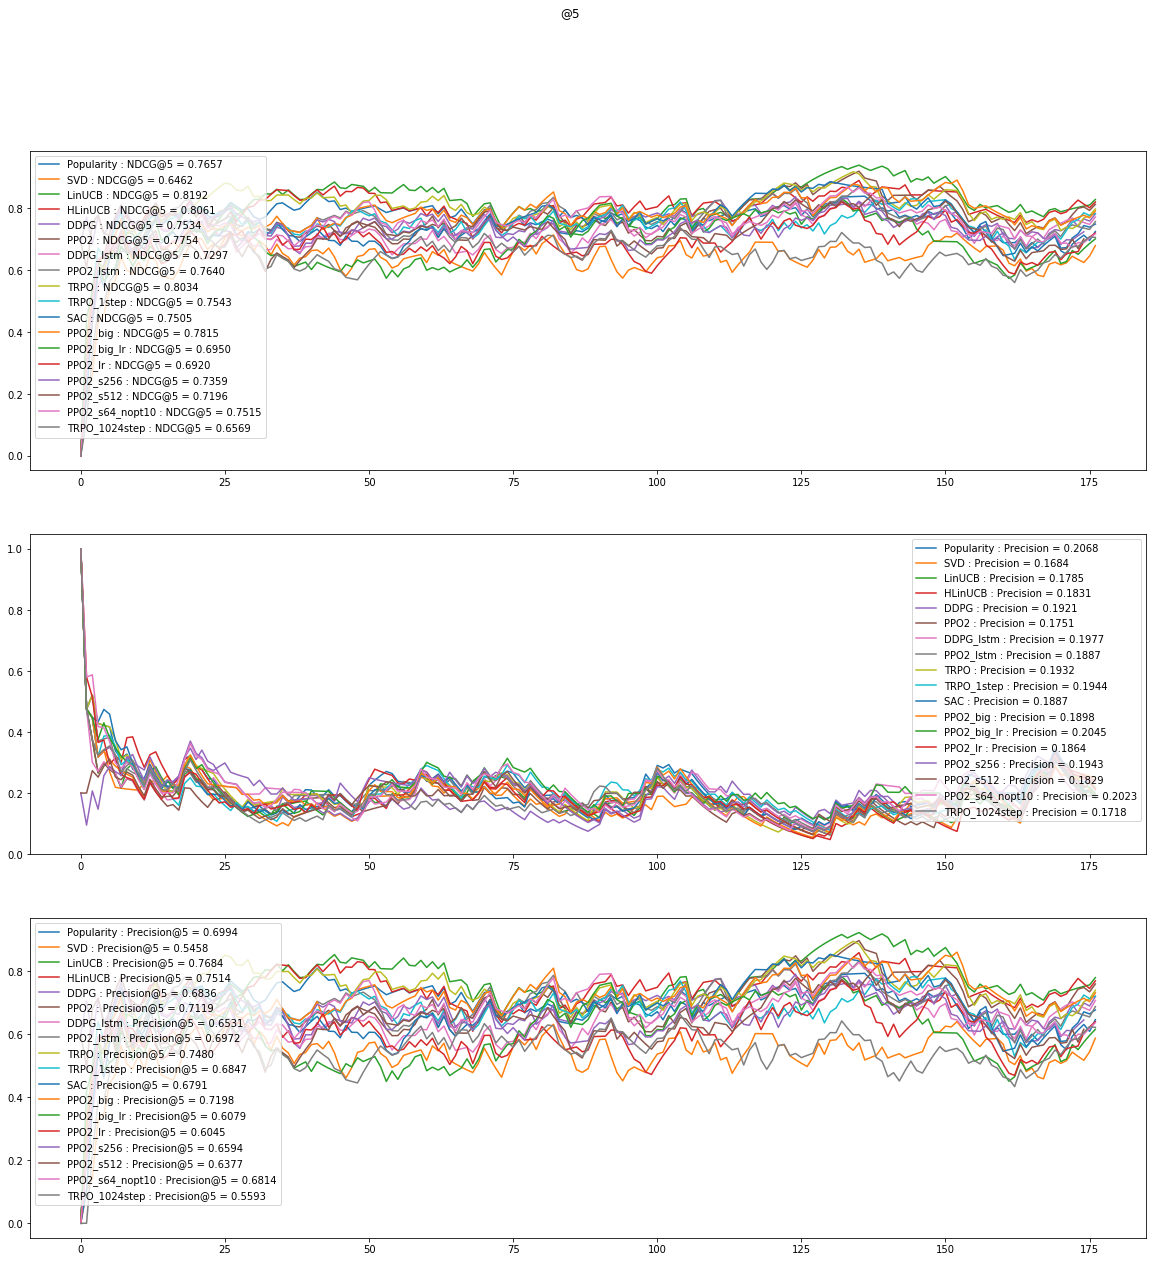

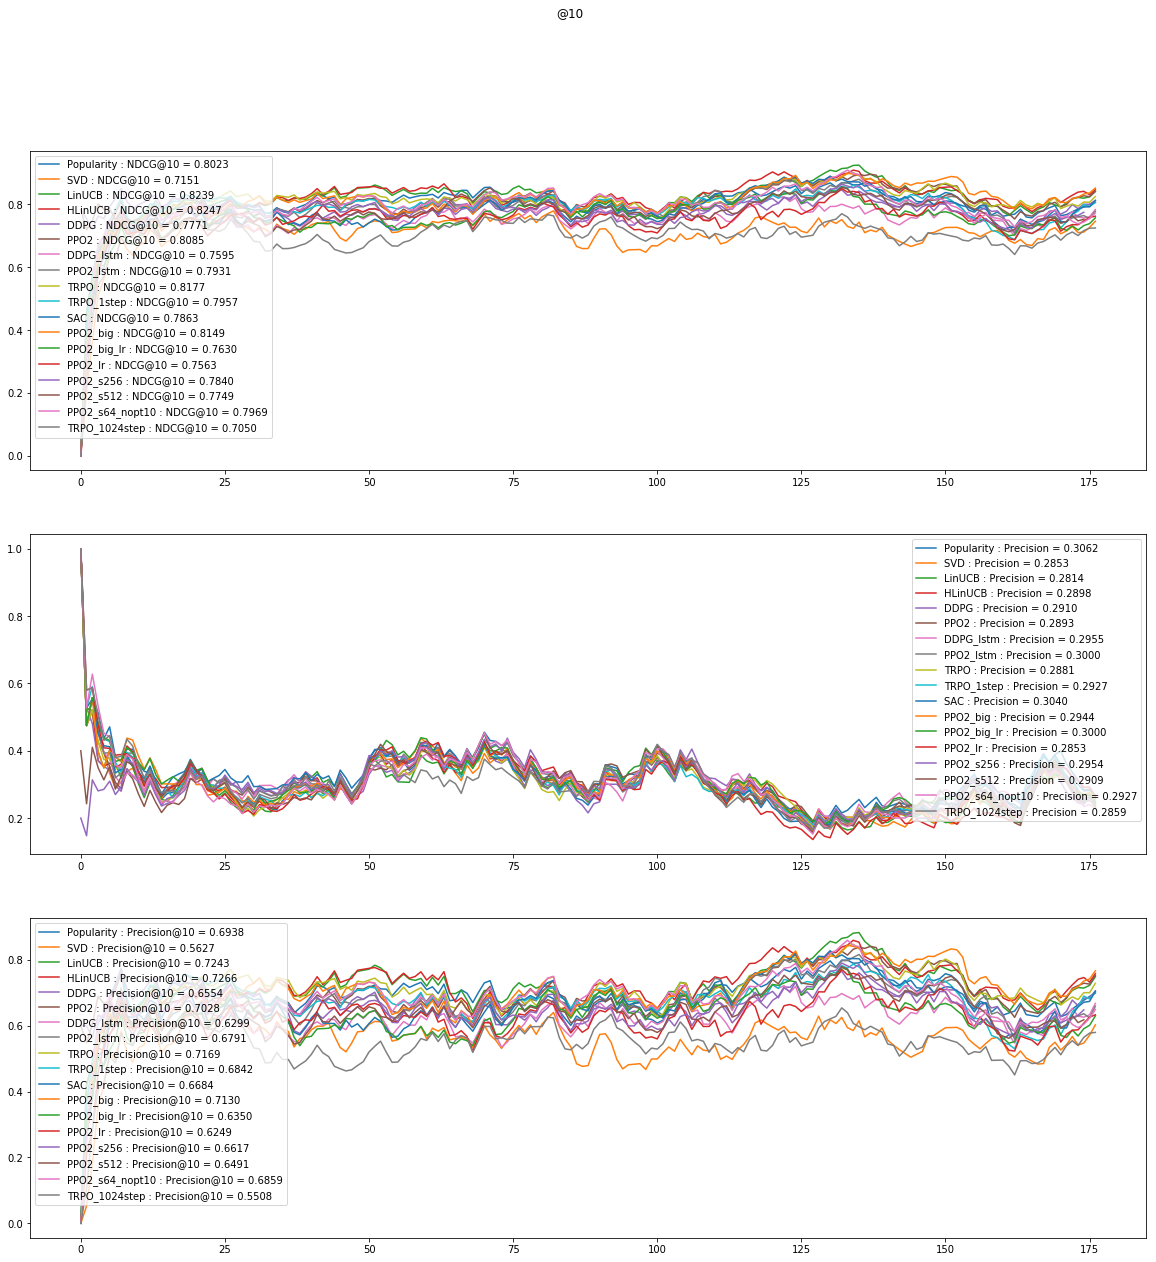

In [108]:
visualize(results);

In [ ]:
%%time
import cloudpickle
with open("results_1m.npz", "wb") as f:
    cloudpickle.dump(results, f)

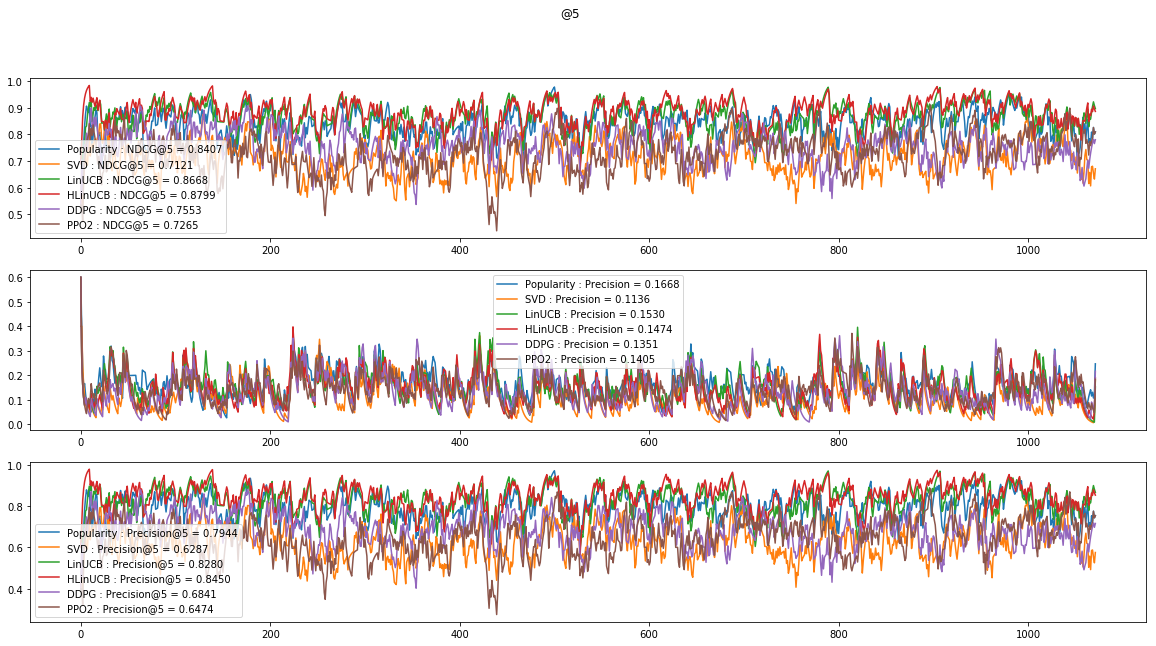

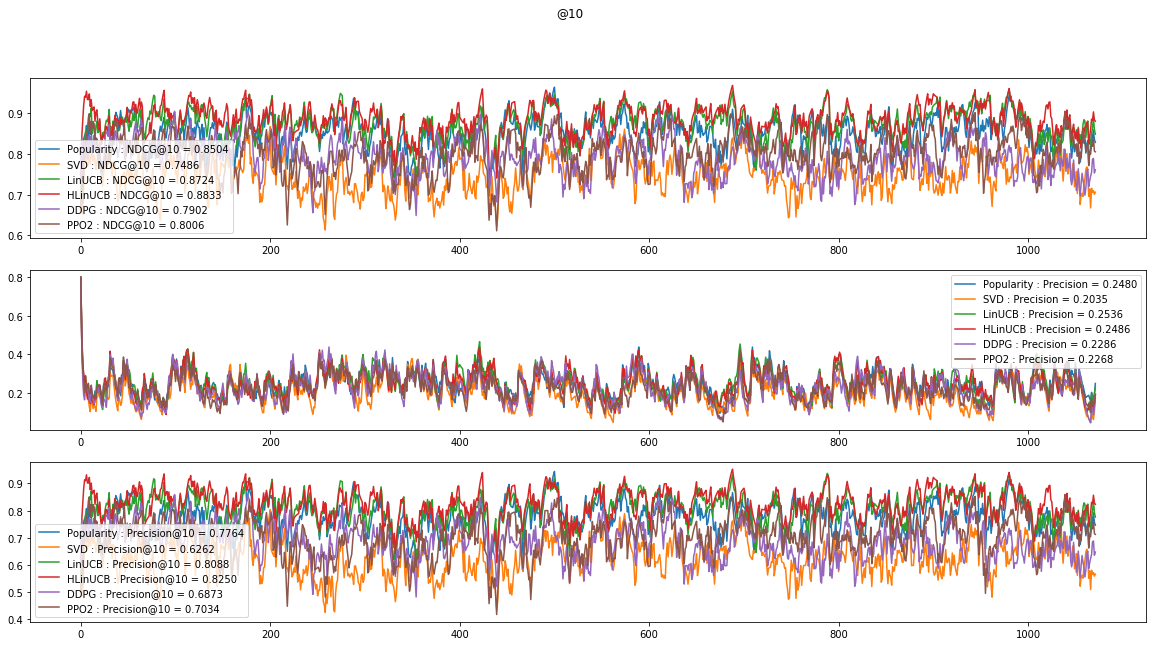

In [58]:
visualize(results);

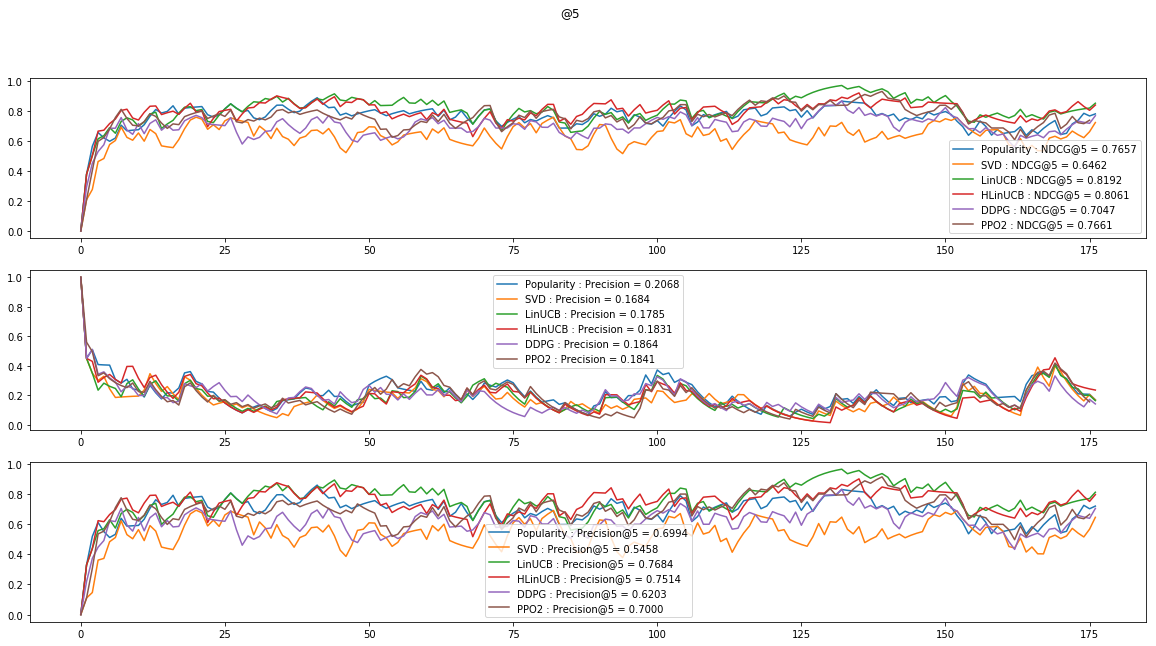

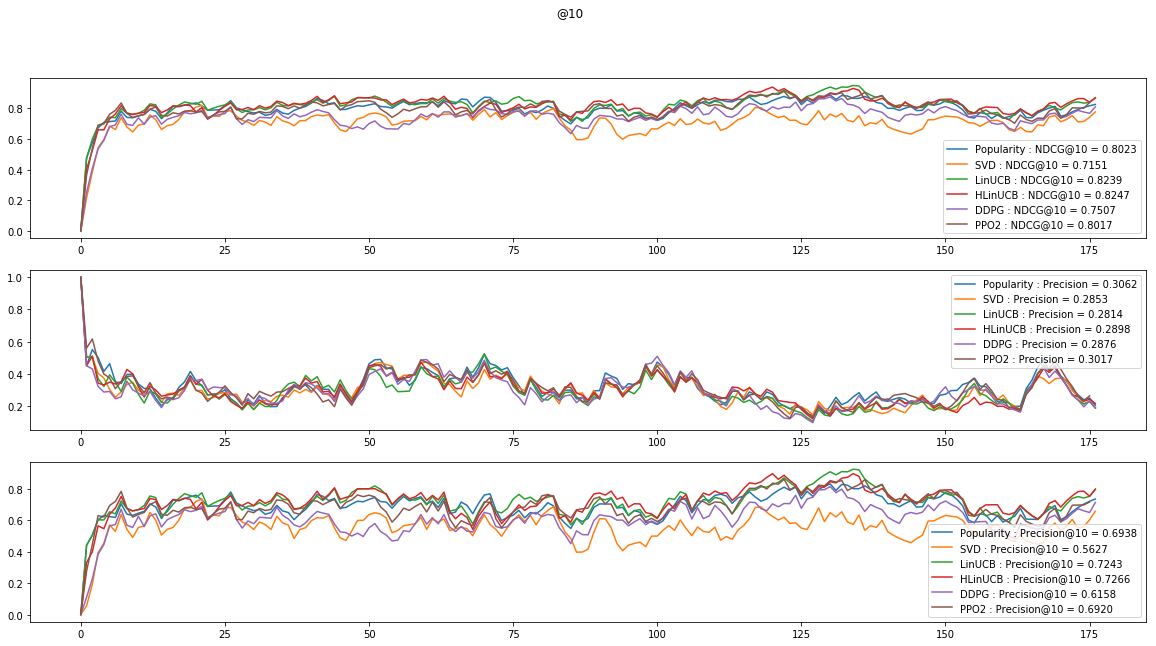

In [172]:
visualize(results);

In [118]:
train_steps = 80000
interactions = results['SVD']

session_recs_by_user = defaultdict(lambda : defaultdict(list))
session_gt_by_user = defaultdict(lambda : defaultdict(list))
session_rewards_by_user = defaultdict(lambda : defaultdict(list))

prev_user = None

for i in interactions[train_steps:]:
    u = i.uid 
    recs = i.recs
    gt = i.raw_info['ground_truth_items']
    rewards = i.rewards
    
    if prev_user is None or u != prev_user:
        prev_user = u
        user_session = len(session_recs_by_user[prev_user])
        
    session_recs_by_user[prev_user][user_session].extend(recs)
    session_gt_by_user[prev_user][user_session].extend(gt)
    session_rewards_by_user[prev_user][user_session].extend(rewards)

In [129]:
# s = pd.Series(precisions_thresh)
# plt.plot(s.rolling(10).mean()[9:]

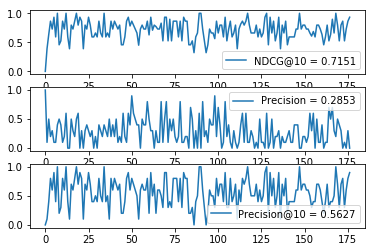

In [135]:
fig, ax = plt.subplots(nrows=3, ncols=1)

precisions = []
precisions_thresh = []
ndcgs = []

K = 10

for k, v in session_recs_by_user.items():
    for session_number in v:
        
        recs = session_recs_by_user[k][session_number]
        gt = session_gt_by_user[k][session_number]
        rew = session_rewards_by_user[k][session_number]
        
        p_at_k = precision_at_k(recs, gt, K)
        precisions.append(p_at_k)
        
        precisions_thresh.append(precision_at_k_thresh(rew, K, 0.25))
        
        ndcgs.append(ndcg_at_k(np.array(rew)>0.25, K))
#         ndcgs.append(ndcg_at_k(np.clip(rew, 0, 1), K))
        

ax[0].plot(ndcgs, label="NDCG@%d = %.4f" % (K, np.mean(ndcgs)))
ax[0].legend()

ax[1].plot(precisions, label="Precision = %.4f" % (np.mean(precisions)) )
ax[1].legend()

ax[2].plot(precisions_thresh, label='Precision@%d = %.4f' % (K, np.mean(precisions_thresh)) )
ax[2].legend()

# plt.figure()
# plt.plot(pd.precisions, label="Precision = %.4f" % (np.mean(precisions)) )
# plt.legend()

# plt.figure()
# plt.plot(precisions_thresh, label='Precision@%d = %.4f' % (K, np.mean(precisions_thresh)) )
# plt.legend()